# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

## **Importing the Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np
import mlflow
import mlflow.pytorch
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import zipfile
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

KeyboardInterrupt: 

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [46]:
# Storing the path of the data file from the Google drive
path = 'Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [2]:
picture_size = 48
folder_path = "Facial_emotion_images/"

### **Happy**

**Observations and Insights:__**

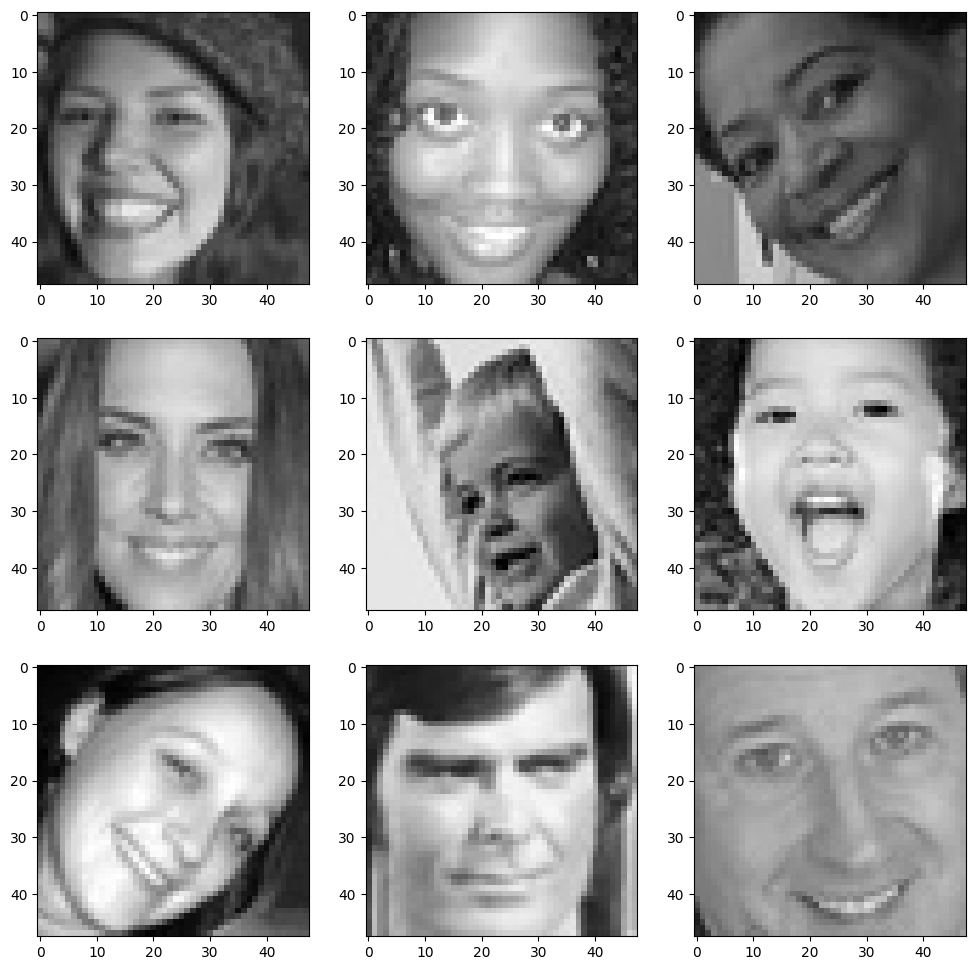

In [48]:
# Visualizing Happy emotion
emotion_type = 'happy'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Sad**

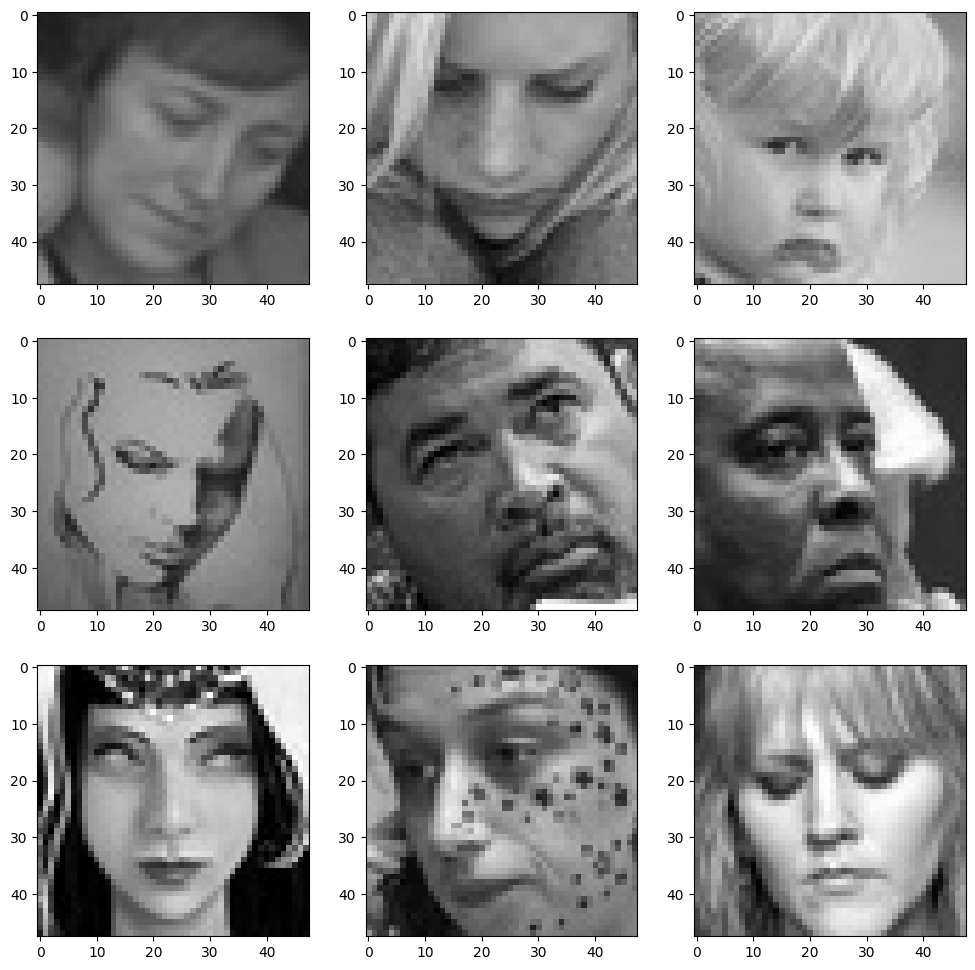

In [49]:
# Visualizing sad emotion
emotion_type = 'sad'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

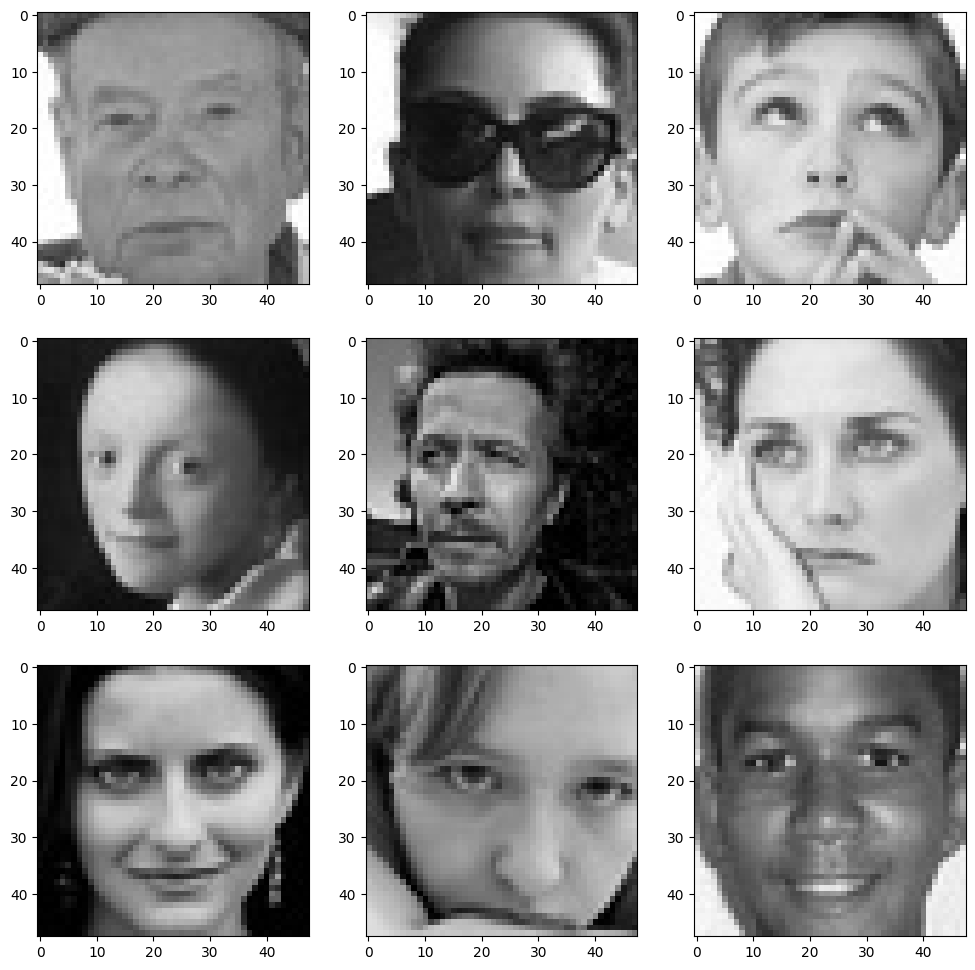

In [50]:
# Visualizing neutral emotion
emotion_type = 'neutral'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Surprised**

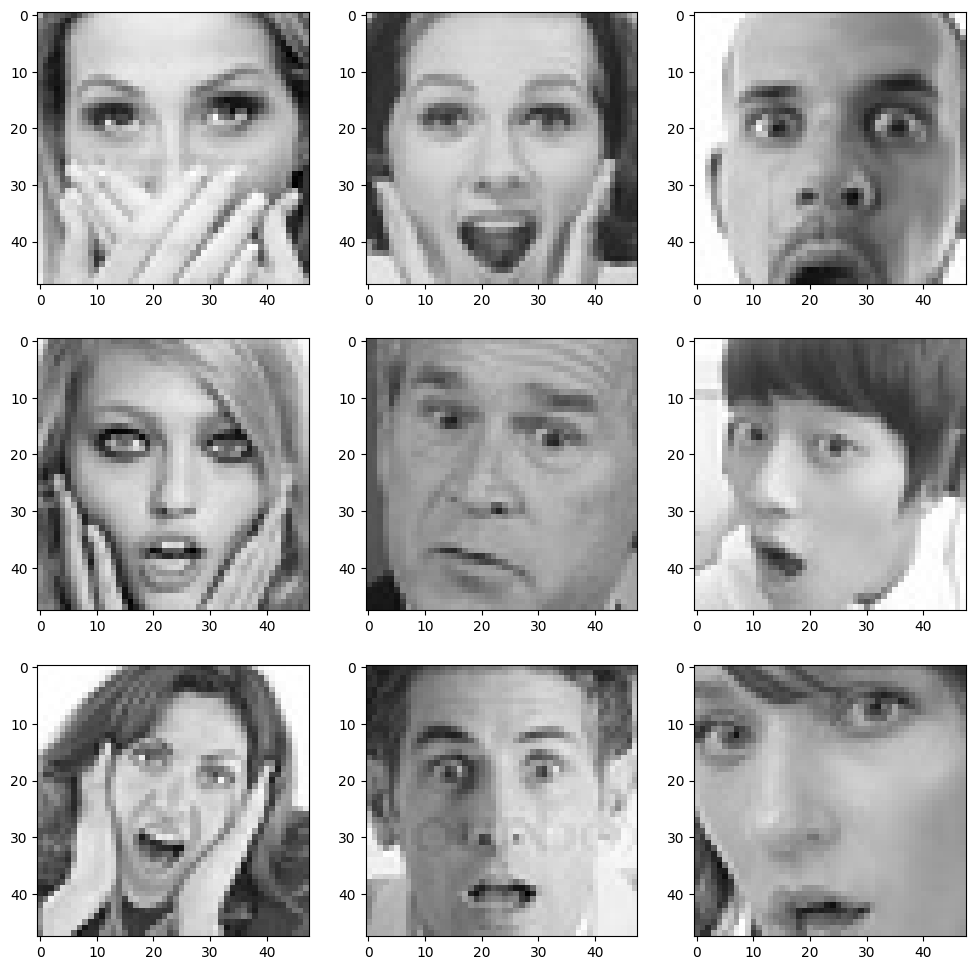

In [51]:
# Visualizing neutral emotion
emotion_type = 'surprise'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [4]:
#TODO add histogram of the data
all_items = os.listdir(folder_path)

emotions = ['happy', 'sad', 'neutral', 'surprise']
# Filter out the items that are files

for emotion in emotions:
    
    path = folder_path + "train/" + emotion
    
    # List all items in the emotion subfolder
    all_items = os.listdir(path)
    
    # Filter out the items that are files and check for common image file extensions
    image_files = [item for item in all_items if os.path.isfile(os.path.join(path, item)) and item.lower().endswith(('.jpg'))]

    # Count the number of image files
    num_files = len(image_files)

    print(f"Number of image files in '{path}': {num_files}")

Number of image files in 'Facial_emotion_images/train/happy': 3976
Number of image files in 'Facial_emotion_images/train/sad': 3982
Number of image files in 'Facial_emotion_images/train/neutral': 3978
Number of image files in 'Facial_emotion_images/train/surprise': 3173


**Observations and Insights:__**

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((picture_size, picture_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the datasets
train_set = datasets.ImageFolder(root=folder_path + 'train/', transform=transform)
val_set = datasets.ImageFolder(root=folder_path + 'validation/', transform=transform)
test_set = datasets.ImageFolder(root=folder_path + 'test/', transform=transform)

# Create the data loaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_set.classes
print(class_names)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [6]:
batch_size  = 128

train_set = tf.keras.utils.image_dataset_from_directory(folder_path + 'train/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

validation_set = tf.keras.utils.image_dataset_from_directory(folder_path + 'validation/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

test_set = tf.keras.utils.image_dataset_from_directory(folder_path + 'test/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)


train_set_color = tf.keras.utils.image_dataset_from_directory(folder_path + 'train/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

validation_set_color = tf.keras.utils.image_dataset_from_directory(folder_path + 'validation/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

test_set_color = tf.keras.utils.image_dataset_from_directory(folder_path + 'test/',
                                              image_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              label_mode = 'categorical',
                                              #classes = emotions,
                                              shuffle = True)

# Add scaling using tf.keras.layers.Rescaling
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply the normalization to the dataset
test_set_color = test_set_color.map(lambda x, y: (normalization_layer(x), y))
train_set_color = train_set_color.map(lambda x, y: (normalization_layer(x), y))
validation_set_color = validation_set_color.map(lambda x, y: (normalization_layer(x), y))


Found 15109 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 15109 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [60]:
def ann_model():
    # Intializing a sequential model
    ann_model = Sequential()

    # Flatten the input to add dense convolutional layers on top of it
    ann_model.add(Flatten(input_shape=(48, 48)))

    # Adding a sequential layer with 256 neurons
    ann_model.add(Dense(256, activation='relu'))

    # Adding a sequential layer with 128 neurons
    ann_model.add(Dense(128, activation='relu'))
    
    # Adding a sequential layer with dropout of 0.2
    ann_model.add(Dropout(0.2))

    # Adding a sequential layer with 64 neurons
    ann_model.add(Dense(64, activation='relu'))
    
    # Adding a sequential layer with 64 neurons
    ann_model.add(Dense(64, activation='relu'))
    
    # Adding a sequential layer with 32 neurons
    ann_model.add(Dense(32, activation='relu'))
    
    # Adding a batch normalization layer
    ann_model.add(BatchNormalization())
    
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    ann_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=0.0005)

    # Compile model
    ann_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return ann_model

In [89]:
def ann_model_color():
    # Intializing a sequential model
    ann_model = Sequential()
    
    ann_model.add(Rescaling(1./255, input_shape=(picture_size, picture_size, 3)))
    # Flatten the input to add dense convolutional layers on top of it
    ann_model.add(Flatten())

    # Adding a sequential layer with 256 neurons
    ann_model.add(Dense(256, activation='relu'))

    # Adding a sequential layer with 128 neurons
    ann_model.add(Dense(128, activation='relu'))
    
    # Adding a sequential layer with dropout of 0.2
    ann_model.add(Dropout(0.2))

    # Adding a sequential layer with 64 neurons
    ann_model.add(Dense(64, activation='relu'))
    
    # Adding a sequential layer with 64 neurons
    ann_model.add(Dense(64, activation='relu'))
    
    # Adding a sequential layer with 32 neurons
    ann_model.add(Dense(32, activation='relu'))
    
    # Adding a batch normalization layer
    ann_model.add(BatchNormalization())
    
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    ann_model.add(Dense(4, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=0.0005)

    # Compile model
    ann_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return ann_model

### **Compiling and Training the Model**

In [95]:
# Enable MLflow autologging for Keras
mlflow.keras.autolog()

# Start an MLflow run for grayscale images
with mlflow.start_run(run_name="Training on grayscale images"):
    
    model = ann_model()

    # Generating the summary of the model
    model.summary()

    history = model.fit(
                train_set, 
                validation_data = validation_set,
                epochs=30,
                shuffle=True,
                batch_size=128,
                verbose=1
    )
#Start another MLflow run for color images
with mlflow.start_run(run_name="Training on color images"):
 
    model_color = ann_model_color()

    # Generating the summary of the model
    model_color.summary()

    history = model_color.fit(
                train_set_color, 
                validation_data = validation_set_color,
                epochs=30,
                shuffle=True,
                batch_size=128,
                verbose=1
    )

c:\Users\ianed\PycharmProjects\class\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 637,732 (2.43 MB)

 Trainable params: 637,668 (2.43 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.2697 - loss: 1.6069 - val_accuracy: 0.2497 - val_loss: 2.2881
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2746 - loss: 1.4732 - val_accuracy: 0.3534 - val_loss: 1.3358
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.3059 - loss: 1.3713 - val_accuracy: 0.3777 - val_loss: 1.3072
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3181 - loss: 1.3513 - val_accuracy: 0.3004 - val_loss: 1.3215
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.3356 - loss: 1.3433 - val_accuracy: 0.2451 - val_loss: 1.3401
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.3598 - loss: 1.3122 - val_accuracy: 0.2568 - val_loss: 1.3634
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.4156 - loss: 1.2461 - val_accuracy: 0.3926 - val_loss: 1.2836
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.4507 - loss: 1.2022 - val_acc

c:\Users\ianed\PycharmProjects\class\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_12 (Rescaling)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 256)            │     1,769,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,817,380 (6.93 MB)

 Trainable params: 1,817,316 (6.93 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.3252 - loss: 1.3435 - val_accuracy: 0.3974 - val_loss: 1.3427
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.4412 - loss: 1.2227 - val_accuracy: 0.4231 - val_loss: 1.3197
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.4830 - loss: 1.1697 - val_accuracy: 0.4555 - val_loss: 1.2720
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.4782 - loss: 1.1688 - val_accuracy: 0.4915 - val_loss: 1.2262
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.4939 - loss: 1.1496 - val_accuracy: 0.4171 - val_loss: 1.2322
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.4939 - loss: 1.1411 - val_accuracy: 0.4846 - val_loss: 1.1813
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.5014 - loss: 1.1336 - val_accuracy: 0.4953 - val_loss: 1.1447
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.5056 - loss: 1.1263 - val

### **Evaluating the Model on the Test Set**

In [100]:

accuracy = model.evaluate(test_set, verbose = 2)

accuracy = model_color.evaluate(test_set_color, verbose = 2)

1/1 - 0s - 359ms/step - accuracy: 0.5781 - loss: 1.0319
1/1 - 0s - 85ms/step - accuracy: 0.5469 - loss: 1.0456


**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [10]:
def cnn_model():
    # Intializing a sequential model
    cnn_model = Sequential()
    
    cnn_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(picture_size, picture_size, 1), padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(MaxPooling2D((2, 2)))
    
    cnn_model.add(BatchNormalization())
    
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(MaxPooling2D((2, 2)))
   
    cnn_model.add(BatchNormalization())
    
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten(input_shape=(32, 32)))

    # Adding a sequential layer with 60 neurons
    cnn_model.add(Dense(32, activation='relu'))

    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Dropout(0.5))
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))


    
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.001)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model


In [11]:
def cnn_model_color():
    # Intializing a sequential model
    cnn_model = Sequential()
    
    cnn_model.add(Rescaling(1./255))
    
    cnn_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(picture_size, picture_size, 1), padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(MaxPooling2D((2, 2)))
    
    cnn_model.add(BatchNormalization())
    
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
   
    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(MaxPooling2D((2, 2)))
   
    cnn_model.add(BatchNormalization())
    
    # Flatten the input to add dense convolutional layers on top of it
    cnn_model.add(Flatten(input_shape=(32, 32)))

    # Adding a sequential layer with 60 neurons
    cnn_model.add(Dense(32, activation='relu'))

    cnn_model.add(LeakyReLU(alpha=0.1))
    
    cnn_model.add(Dropout(0.5))
    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    cnn_model.add(Dense(4, activation='softmax'))


    
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.001)

    # Compile model
    cnn_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return cnn_model


### **Compiling and Training the Model**

In [ ]:
# Start an MLflow run for grayscale images
with mlflow.start_run(run_name="Training on grayscale images with CNN"):
    model = cnn_model()

    # Generating the summary of the model
    model.summary()

    history = model.fit(
                train_set, 
                validation_data = validation_set,
                epochs=30,
                shuffle=True,
                batch_size=128,
                verbose=1
    )

# Start an MLflow run for grayscale images
with mlflow.start_run(run_name="Training on grayscale images with CNN"):
    model_color = cnn_model()

    # Generating the summary of the model
    model_color.summary()

    history = model.fit(
                train_set, 
                validation_data = validation_set,
                epochs=30,
                shuffle=True,
                batch_size=128,
                verbose=1
    )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,004 (1.25 MB)

 Trainable params: 327,812 (1.25 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 329ms/step - accuracy: 0.2985 - loss: 1.4858 - val_accuracy: 0.4637 - val_loss: 1.3280
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 301ms/step - accuracy: 0.3582 - loss: 1.2767 - val_accuracy: 0.4585 - val_loss: 1.2172
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 293ms/step - accuracy: 0.4206 - loss: 1.1830 - val_accuracy: 0.4882 - val_loss: 1.1906
Epoch 4/30
 81/119 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - accuracy: 0.4384 - loss: 1.1451

### **Evaluating the Model on the Test Set**

In [ ]:
test_images, test_labels = next(test_set)
accuracy = model.evaluate(test_images, test_labels, verbose = 2)

4/4 - 0s - 15ms/step - accuracy: 0.5469 - loss: 1.0641


**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the VGG16 Model**

### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the ResNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

### **Compiling and Training the Model**

### **Evaluating the Model on Test Set**

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?